In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle
import os

path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsauswertung\EBZ NHTS\Werktag\Auswertungsergebnisse\NHTS_Trips_Werktag_CS3_Ladezeiten.pickle"
df = pickle.load(open(path, 'rb'))

In [3]:
df.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,300000071,1,1,4,600,40,615,15,8.439,295,100.0,95.9,615.0,642.0
1,300000071,2,4,1,910,61,930,20,8.286,1110,100.0,96.0,930.0,956.0
2,300000073,1,1,2,525,35,540,15,3.621,330,100.0,97.3,540.0,548.0
3,300000073,2,2,1,870,58,885,15,3.610,1080,100.0,97.3,885.0,893.0
4,300000081,1,1,2,675,45,690,15,12.902,720,100.0,96.4,690.0,720.0


In [4]:
# Anzahl Fahrzeuge entspricht Anzahl der ersten Trips
no_cars = len(df[df["Trip_no"]==1])

## Filtern und Vorbereiten der Analyse

In [5]:
# Fahrten auf solche mit anschließendem Ladevorgang filtern
filt = df["Charge_start"].notnull()
df_filt = df[filt]

In [6]:
df_filt.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,300000071,1,1,4,600,40,615,15,8.439,295,100.0,95.9,615.0,642.0
1,300000071,2,4,1,910,61,930,20,8.286,1110,100.0,96.0,930.0,956.0
2,300000073,1,1,2,525,35,540,15,3.621,330,100.0,97.3,540.0,548.0
3,300000073,2,2,1,870,58,885,15,3.610,1080,100.0,97.3,885.0,893.0
4,300000081,1,1,2,675,45,690,15,12.902,720,100.0,96.4,690.0,720.0


In [7]:
# reduzierte Liste neu indizieren
df_filt.reset_index(drop=True, inplace=True)
df_filt.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,300000071,1,1,4,600,40,615,15,8.439,295,100.0,95.9,615.0,642.0
1,300000071,2,4,1,910,61,930,20,8.286,1110,100.0,96.0,930.0,956.0
2,300000073,1,1,2,525,35,540,15,3.621,330,100.0,97.3,540.0,548.0
3,300000073,2,2,1,870,58,885,15,3.610,1080,100.0,97.3,885.0,893.0
4,300000081,1,1,2,675,45,690,15,12.902,720,100.0,96.4,690.0,720.0


In [8]:
df_filt["Charge_end"] = df_filt["Charge_end"].apply(lambda x: x-1440 if x > 1440 else x)

C:\Users\thoma\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df_filt.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,300000071,1,1,4,600,40,615,15,8.439,295,100.0,95.9,615.0,642.0
1,300000071,2,4,1,910,61,930,20,8.286,1110,100.0,96.0,930.0,956.0
2,300000073,1,1,2,525,35,540,15,3.621,330,100.0,97.3,540.0,548.0
3,300000073,2,2,1,870,58,885,15,3.610,1080,100.0,97.3,885.0,893.0
4,300000081,1,1,2,675,45,690,15,12.902,720,100.0,96.4,690.0,720.0


In [10]:
df_filt.describe()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
count,4.739450e+05,473945.000000,473945.000000,473945.000000,473945.000000,473945.000000,473945.000000,473945.000000,473945.000000,473945.000000,473945.000000,473945.000000,473945.000000,473945.000000
mean,3.494695e+08,3.328623,2.573946,2.260788,812.518653,54.159848,831.563515,21.033348,15.299498,419.701039,96.690474,90.010630,831.563515,854.485544
std,5.118507e+07,2.302836,1.373417,1.278854,263.359279,17.558141,263.965440,27.636570,42.138605,426.660867,37.177155,45.966677,263.965440,273.782940
min,3.000001e+08,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-9.000000,0.002000,16.000000,-8416.600000,-8434.500000,0.000000,1.000000
25%,3.025674e+08,2.000000,1.000000,1.000000,600.000000,40.000000,615.000000,10.000000,3.423000,60.000000,99.400000,90.600000,615.000000,637.000000
50%,3.051672e+08,3.000000,3.000000,2.000000,825.000000,55.000000,841.000000,15.000000,7.757000,210.000000,100.000000,95.800000,841.000000,865.000000
75%,4.035878e+08,4.000000,4.000000,3.000000,1020.000000,68.000000,1045.000000,25.000000,16.452000,740.000000,100.000000,98.200000,1045.000000,1075.000000
max,4.038182e+09,50.000000,5.000000,5.000000,1439.000000,96.000000,1439.000000,990.000000,8757.206000,1439.000000,100.000000,100.000000,1439.000000,1440.000000


## Ermitteln der Anzahl ladender Fahrzeuge über Zeitverlauf

In [11]:
# erhöhen des cars_charging Zähler um 1 für jeden Ladevorgang zwischen Charge_start und Charge_end
def calc_cars_charging(df_filt):
    # initialisieren Liste 
    cars_charging = [0 for i in range(1441)]
    for i in range(len(df_filt)):
        if df_filt.at[i, "Charge_start"] < df_filt.at[i, "Charge_end"]:
            for j in range(int(df_filt.at[i, "Charge_start"]), int(df_filt.at[i, "Charge_end"]) + 1):
                cars_charging[j] += 1
        else: 
            for j in range(int(df_filt.at[i, "Charge_start"]), 1441):
                cars_charging[j] += 1
            for j in range(0, int(df_filt.at[i, "Charge_end"])):
                cars_charging[j] += 1
    return cars_charging

In [12]:
cars_charging_total = calc_cars_charging(df_filt)
# normieren des Ergebnis auf Anzahl simulierter Fahrzeuge
# ACHTUNG: Wert anpassen, bei Anpassung der Simulation (Globalvariable in Ergebnis speichern und hier über Variable definieren?)
relative_cars_charging_total = [x/no_cars for x in cars_charging_total]

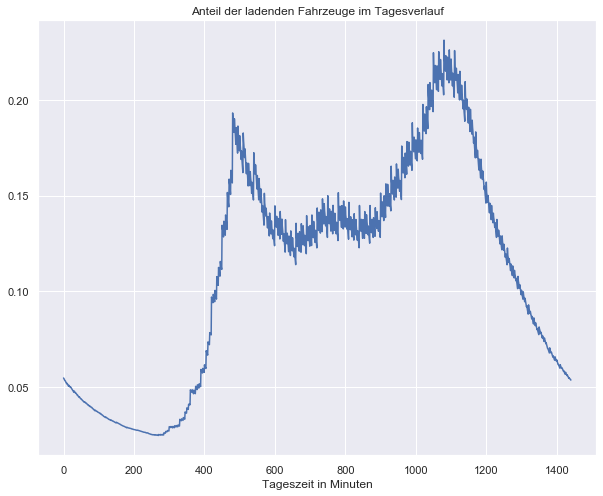

In [13]:
# Visualisieren
sns.set()
plt.figure(figsize=(10,8))
x = np.linspace(0, 1440, 1441)
plt.title("Anteil der ladenden Fahrzeuge im Tagesverlauf")
plt.xlabel("Tageszeit in Minuten")
plt.plot(x, relative_cars_charging_total);

## Anteiliges darstellen der Ladevorgänge nach Zustand

In [14]:
# Aufteilen des Datensatz nach Zustand in dem geladen wird

filt = df_filt["Whyto"] == 1
df_home = df_filt[filt]
df_home.reset_index(drop=True, inplace=True)

filt = df_filt["Whyto"] == 2
df_work = df_filt[filt]
df_work.reset_index(drop=True, inplace=True)

filt = df_filt["Whyto"] == 3
df_shopping = df_filt[filt]
df_shopping.reset_index(drop=True, inplace=True)

filt = df_filt["Whyto"] == 4
df_recreational = df_filt[filt]
df_recreational.reset_index(drop=True, inplace=True)

filt = df_filt["Whyto"] == 5
df_other = df_filt[filt]
df_other.reset_index(drop=True, inplace=True)

In [15]:
# berechnen der Anzahl an Fahrzeugen die laden

cars_charging_home = calc_cars_charging(df_home)
cars_charging_work = calc_cars_charging(df_work)
cars_charging_shopping = calc_cars_charging(df_shopping)
cars_charging_recreational = calc_cars_charging(df_recreational)
cars_charging_other = calc_cars_charging(df_other)

In [16]:
# normieren auf Gesamtanzahl simulierter Fahrzeuge

relative_cars_charging_home = [x/no_cars for x in cars_charging_home]
relative_cars_charging_work = [x/no_cars for x in cars_charging_work]
relative_cars_charging_shopping = [x/no_cars for x in cars_charging_shopping]
relative_cars_charging_recreational = [x/no_cars for x in cars_charging_recreational]
relative_cars_charging_other = [x/no_cars for x in cars_charging_other]

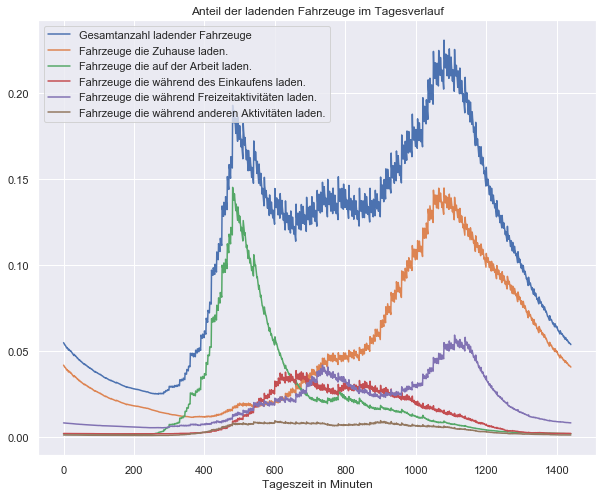

In [17]:
# Visualisieren des Ergebnisses

plt.figure(figsize=(10,8));
x = np.linspace(0, 1440, 1441)
plt.title("Anteil der ladenden Fahrzeuge im Tagesverlauf");
plt.xlabel("Tageszeit in Minuten");
plt.plot(x, relative_cars_charging_total, label="Gesamtanzahl ladender Fahrzeuge");
plt.plot(x, relative_cars_charging_home, label="Fahrzeuge die Zuhause laden.");
plt.plot(x, relative_cars_charging_work, label="Fahrzeuge die auf der Arbeit laden.");
plt.plot(x, relative_cars_charging_shopping, label="Fahrzeuge die während des Einkaufens laden.");
plt.plot(x, relative_cars_charging_recreational, label="Fahrzeuge die während Freizeitaktivitäten laden.");
plt.plot(x, relative_cars_charging_other, label="Fahrzeuge die während anderen Aktivitäten laden.");
plt.legend();

In [18]:
ebz = [relative_cars_charging_total, relative_cars_charging_home, relative_cars_charging_work, relative_cars_charging_shopping, relative_cars_charging_recreational, relative_cars_charging_other]

In [19]:
import pickle

path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsauswertung\EBZ NHTS\Werktag\Auswertungsergebnisse\Ladende_Fahrzeuge_CS3.pickle"

pickle.dump(ebz, open(path, "wb"))